In [156]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold

In [2]:
class AdjacencyMatrix:
    def __init__(self,point_node_number,maximum_distance):

        self.adjacency_matrix =np.zeros((point_node_number,point_node_number))
        self.maximum_distance = maximum_distance
        self.nodes_number = point_node_number
        self.depot = 0
        self.time_table = {}
        for i in range(0,point_node_number):
           for j in range(0,point_node_number): 
                if i==j:
                    continue
                elif self.adjacency_matrix[i][j] !=self.adjacency_matrix[j][i] :

                    if self.adjacency_matrix[i][j]==0:
                        self.adjacency_matrix[i][j]=self.adjacency_matrix[j][i]
                    elif self.adjacency_matrix[j][i] == 0:
                        self.adjacency_matrix[j][i]=self.adjacency_matrix[i][j]
                    continue
                else:
                    self.adjacency_matrix[i][j] = np.random.randint(1,maximum_distance)
        
        
    def getNodeNumber(self):
        return self.nodes_number 

    def getMaxdistance(self):
        return self.maximum_distance 

    def getAdjacencyMatrix(self):
        return self.adjacency_matrix




In [157]:
class VRPDataset:
    def __init__(self,Adjacency_matrix):
        self.Adjacency_matrix = Adjacency_matrix
        self.adjacency_matrix = self.Adjacency_matrix.getAdjacencyMatrix()
        self.nodes_number = self.Adjacency_matrix.getNodeNumber()
        self.max_distance = self.Adjacency_matrix.getMaxdistance()
        self.depot = 0
        self.num_vehicle=1
        self.time_table = {}
        time_list = list(range(0,self.nodes_number))

        for i in time_list:
            self.time_table['{start}-{end}'.format(start=i,end= i+1)] = -1
        
        adist = np.array(self.adjacency_matrix)
        amax = np.amax(adist)
        adist /= amax

        mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
        results = mds.fit(adist)

        self.coords = results.embedding_


    def setTimeWindow(self,time_table_key,node_index):

        for key in self.time_table.keys():
            if self.time_table[key] == node_index:
                print("The node",node_index," already exist in",key)
                return False

        if self.time_table[time_table_key]== -1:
            print("The node",node_index,"is assigned in Timetable",key)
            self.time_table[time_table_key] = node_index
            return True
        else:
            print("Other node",self.time_table[time_table_key],"exists already in Timetable",time_table_key)
            return False
    
    def setDepot(self,depot_index):
        self.depot = depot_index

    def setVehicles(self,num_vehicle):
        self.num_vehicle = num_vehicle

    def getTimeTable(self):
        return self.time_table

    def getCoordinates(self):
        return self.coords
    
    def plot_coords(self):
        coords = self.coords
        cities = []
        for i in range(0,len(coords)):
            cities.append('city_{}'.format(i+1))

        plt.subplots_adjust(bottom = 0.1)
        plt.scatter(
            coords[:, 0], coords[:, 1], marker = 'o'
            )
        for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
            plt.annotate(
                label,
                xy = (x, y), xytext = (-20, 20),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

        plt.show()
    

    

In [4]:
class Vehecle:
    def __init__(self,capacity,travel_nodes,depot,adjacency_matrix):
        self.depot = depot
        self.Node_visit_capacity = capacity
        self.travel_nodes = travel_nodes
        self.current_positon = self.depot
        self.adjacency_matrix = adjacency_matrix
        
    def updateCurrentPosition(self,position):
        self.current_positon=position

    def getTotalTraveilingDistance(self):
        Travel_total = self.adjacency_matrix[self.depot][self.travel_nodes[0]]
        for i in range(1,len(self.travel_nodes)):
            Travel_total+=self.adjacency_matrix[i-1][i]
            
        return Travel_total

In [8]:
ADJ = AdjacencyMatrix(10,100)
VRP_dataset = VRPDataset(ADJ)

In [11]:
adj_matrix = VRP_dataset.adjacency_matrix

In [14]:
line_1 = adj_matrix[]

In [113]:
Gram_matrix = np.zeros(adj_matrix.shape)

In [114]:
for i in range(0,len(adj_matrix)):
    for j in range(0,len(adj_matrix[i])):
        Gram_matrix[i][j] = (adj_matrix[0,j]**2+adj_matrix[i,0]**2-adj_matrix[i,j]**2)/2

G  = XX^T

In [115]:
Gram_matrix

array([[    0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0. ,
            0. ,     0. ,     0. ],
       [    0. ,  6561. ,  2899. ,  1360.5,  4418. ,  6834. ,  6940.5,
         3321. ,  6891. ,  2480.5],
       [    0. ,  2899. ,  2601. ,  -828. ,  5106. ,  1956.5,  1828.5,
        -2277. ,  4900.5,  3985. ],
       [    0. ,  1360.5,  -828. ,   784. ,  4797.5,  2408. ,  2964.5,
         -880. ,  1340. ,  1522.5],
       [    0. ,  4418. ,  5106. ,  4797.5,  8836. ,  7234. ,  7100.5,
         4246. ,  7106. ,  3532.5],
       [    0. ,  6834. ,  1956.5,  2408. ,  7234. ,  7396. ,  3036.5,
         4454. ,  6698. ,  6268.5],
       [    0. ,  6940.5,  1828.5,  2964.5,  7100.5,  3036.5,  8281. ,
         2803. ,  6452.5,  6615. ],
       [    0. ,  3321. , -2277. ,  -880. ,  4246. ,  4454. ,  2803. ,
         1681. ,  3348.5,  2853. ],
       [    0. ,  6891. ,  4900.5,  1340. ,  7106. ,  6698. ,  6452.5,
         3348.5,  7225. ,  6312.5],
       [    0. ,  2480.5,  3985. ,  1

NameError: name 'cities' is not defined

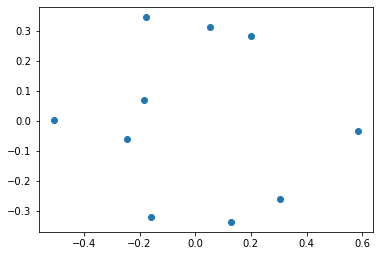

In [155]:
coords

array([[ 0.58556029, -0.03350792],
       [-0.17559147,  0.34527353],
       [-0.16028146, -0.32047802],
       [ 0.30468846, -0.2622291 ],
       [ 0.12823996, -0.33671424],
       [ 0.05465306,  0.31185353],
       [-0.50823994,  0.00284461],
       [ 0.19995117,  0.28439266],
       [-0.18464415,  0.06796782],
       [-0.24433592, -0.05940288]])

In [159]:
'city_{}'.format(4)

'city_4'